In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

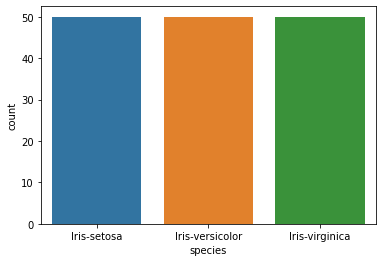

In [7]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(iris['species'], label="Count")
plt.show()

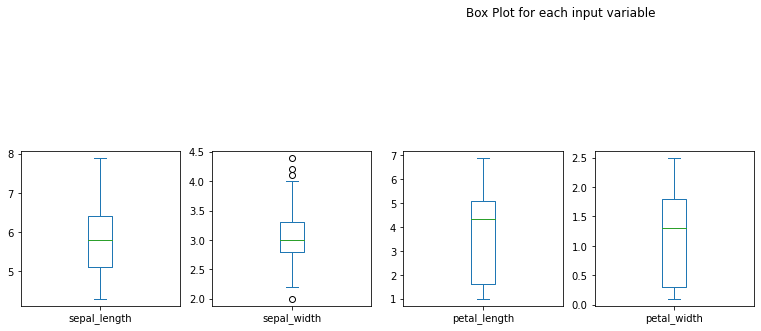

In [8]:
iris.drop('species', axis=1).plot(kind="box", subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,20), title="Box Plot for each input variable")
plt.show()

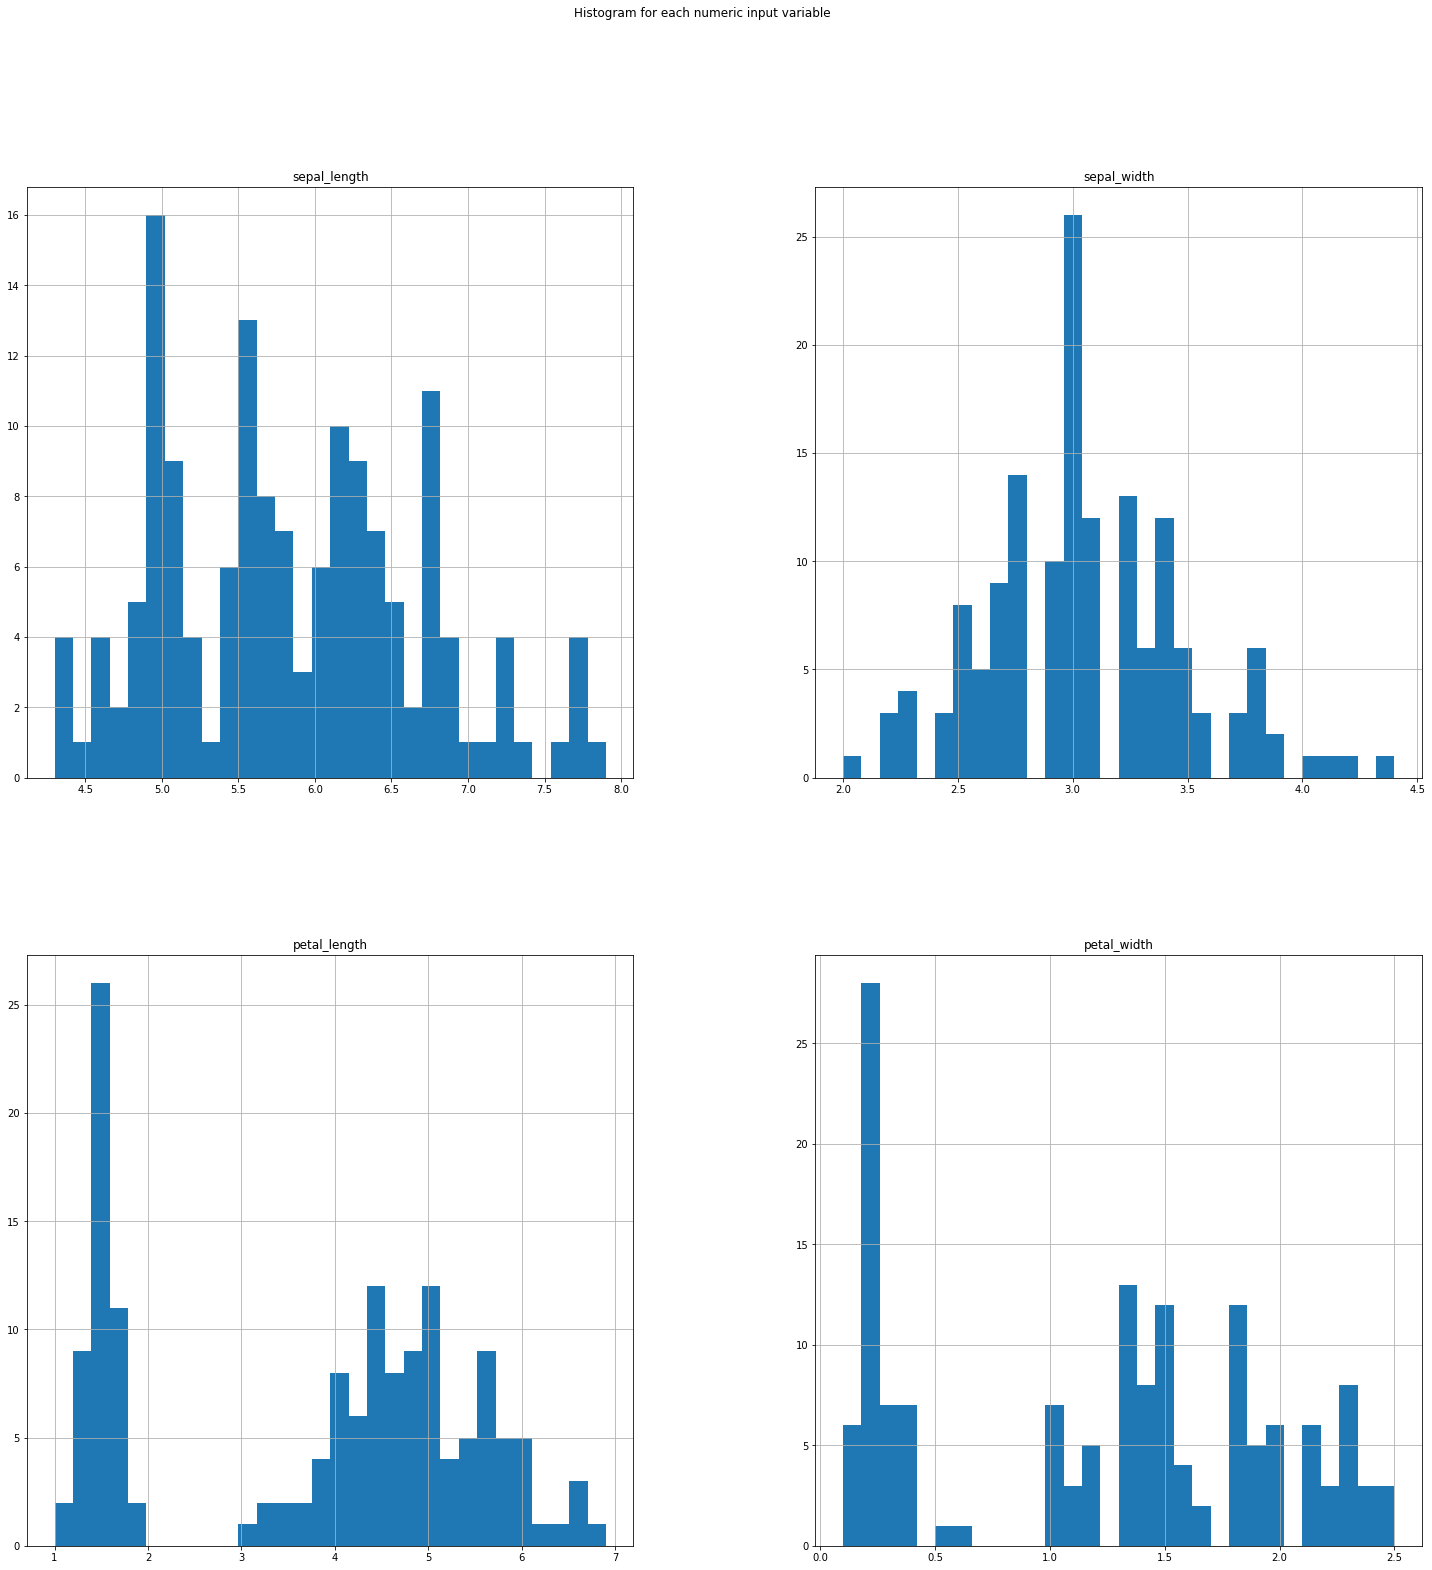

In [9]:
import pylab as pl
iris.drop('species', axis=1).hist(bins=30, figsize=(25,25))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

## Whale Optimization Algorithm

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy.linalg import norm

def WOA(iris, lb, ub, dim ,SearchAgent, maxIter):
    
    whalePop = []
    for i in range(SearchAgent):
        tmp = np.random.rand(3*dim)*(ub-lb)-(ub-lb)/2
        whalePop.append(tmp)
        
    t = 0
    count = 0
    bestWhale = None
    currentBestWhale = None
    fitness_vec = []
    P = len(iris)
    b = 0.1
    
    while t<maxIter:
        
        fitnessPop = []
        
        for whale in whalePop:
            fitnessWhale = 0
            for p in range(P):
                distances = [norm(iris.iloc[p]-whale[0:4]),norm(iris.iloc[p]-whale[4:8]), norm(iris.iloc[p]-whale[8:12])]
                idxDist = np.argmin(distances)
                fitnessWhale += distances[idxDist]
            fitnessPop.append(fitnessWhale)
            count += 1
        
        
        idxFit = np.argmin(fitnessPop)
        bestWhale = whalePop[idxFit]
        fitness_vec.append(fitnessPop[idxFit])
        
        print("Iteration "+str(t)+", Fitness of best whale "+str(fitnessPop[idxFit]))
        
        for i,whale in enumerate(whalePop, 0):
            
            if i != idxFit:
                
                a = 2-(2*t)/maxIter
                r = np.ones(3*dim)*np.random.uniform(0,1,1)[0]
                A = 2*a*r-a
                C = 2*r
                p = np.random.uniform(0,1,1)[0]
                l = np.random.uniform(-1,1,1)[0]
            
                if p<0.5:
                    if norm(A)<1:
                        D = np.multiply(C,bestWhale)-whale
                        whalePop[i] = bestWhale-np.multiply(A,D)
                        
                    elif norm(A) >= 1: 
                        #Phase of exploration
                        XRand = np.random.rand(3*dim) #must not necessarily be in [0,1]
                        #D = np.abs(np.multiply(C,bestWhale)-whale)
                        D = np.multiply(C,bestWhale)-whale
                        whalePop[i] = XRand-np.multiply(A,D)
                        
                elif p>= 0.5:
                    #Phase of spiral
                    D_ = bestWhale-whale
                    whalePop[i] = D_*np.exp(b*l)*np.cos(2*np.pi*l)+bestWhale
                    
                #Bring back whale which is out of search space
                for j,coordinate in enumerate(bestWhale,0):
                    if coordinate > 1:
                        bestWhale[j] = 0.5
                    elif coordinate < 0:
                        bestWhale[j] = 0.5 
                        
        t +=1
        z1,z2,z3 = bestWhale[0:4],bestWhale[4:8],bestWhale[8:12]
        
    return z1,z2,z3

In [11]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
iris.species = encode.fit_transform(iris.species)

In [12]:
X = iris.drop('species',axis = 1)
y = iris.species

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris = scaler.fit_transform(X)
iris = pd.DataFrame(iris)
iris = iris.sample(frac=1)

In [14]:
dim = len(iris.columns)
z1,z2,z3 = WOA(iris, 0, 1, dim, 10, 100)

Iteration 0, Fitness of best whale 107.29499363136958
Iteration 1, Fitness of best whale 66.8295514635292
Iteration 2, Fitness of best whale 65.37283300472382
Iteration 3, Fitness of best whale 52.000698820750756
Iteration 4, Fitness of best whale 52.000698820750756
Iteration 5, Fitness of best whale 48.47009293041192
Iteration 6, Fitness of best whale 48.47009293041192
Iteration 7, Fitness of best whale 48.47009293041192
Iteration 8, Fitness of best whale 48.47009293041192
Iteration 9, Fitness of best whale 47.99703551049158
Iteration 10, Fitness of best whale 47.99703551049158
Iteration 11, Fitness of best whale 47.99703551049158
Iteration 12, Fitness of best whale 46.60847140737982
Iteration 13, Fitness of best whale 46.60847140737982
Iteration 14, Fitness of best whale 46.60847140737982
Iteration 15, Fitness of best whale 46.13709485661697
Iteration 16, Fitness of best whale 46.13709485661697
Iteration 17, Fitness of best whale 46.13709485661697
Iteration 18, Fitness of best whale 

In [15]:
cluster = []
P = len(iris)
for p in range(P):
    distances = [norm(iris.iloc[p]-z1),norm(iris.iloc[p]-z2),norm(iris.iloc[p]-z3)]
    cluster.append((np.argmin(distances)+1))
iris["cluster"] = cluster

In [16]:
counter = 0
P = len(iris)
for p in range(P):
    if iris.iloc[p].cluster == y.iloc[p]:
        counter += 1
acc = counter / P
print("acc: " + str(acc))

acc: 0.20666666666666667
